# 提案手法

In [1]:
from newresearch import *

Using TensorFlow backend.


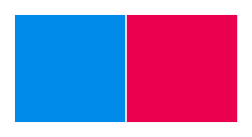

In [2]:
# Retina display
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_columns', 500)
tqdm.pandas()
np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

ccolors = ["#008ae9", "#ea004f"]
sns.set_palette(ccolors)
sns.palplot(sns.color_palette())

SEED = 0
DATASET = 'credit-g'

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/datasets/openml.py:305: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


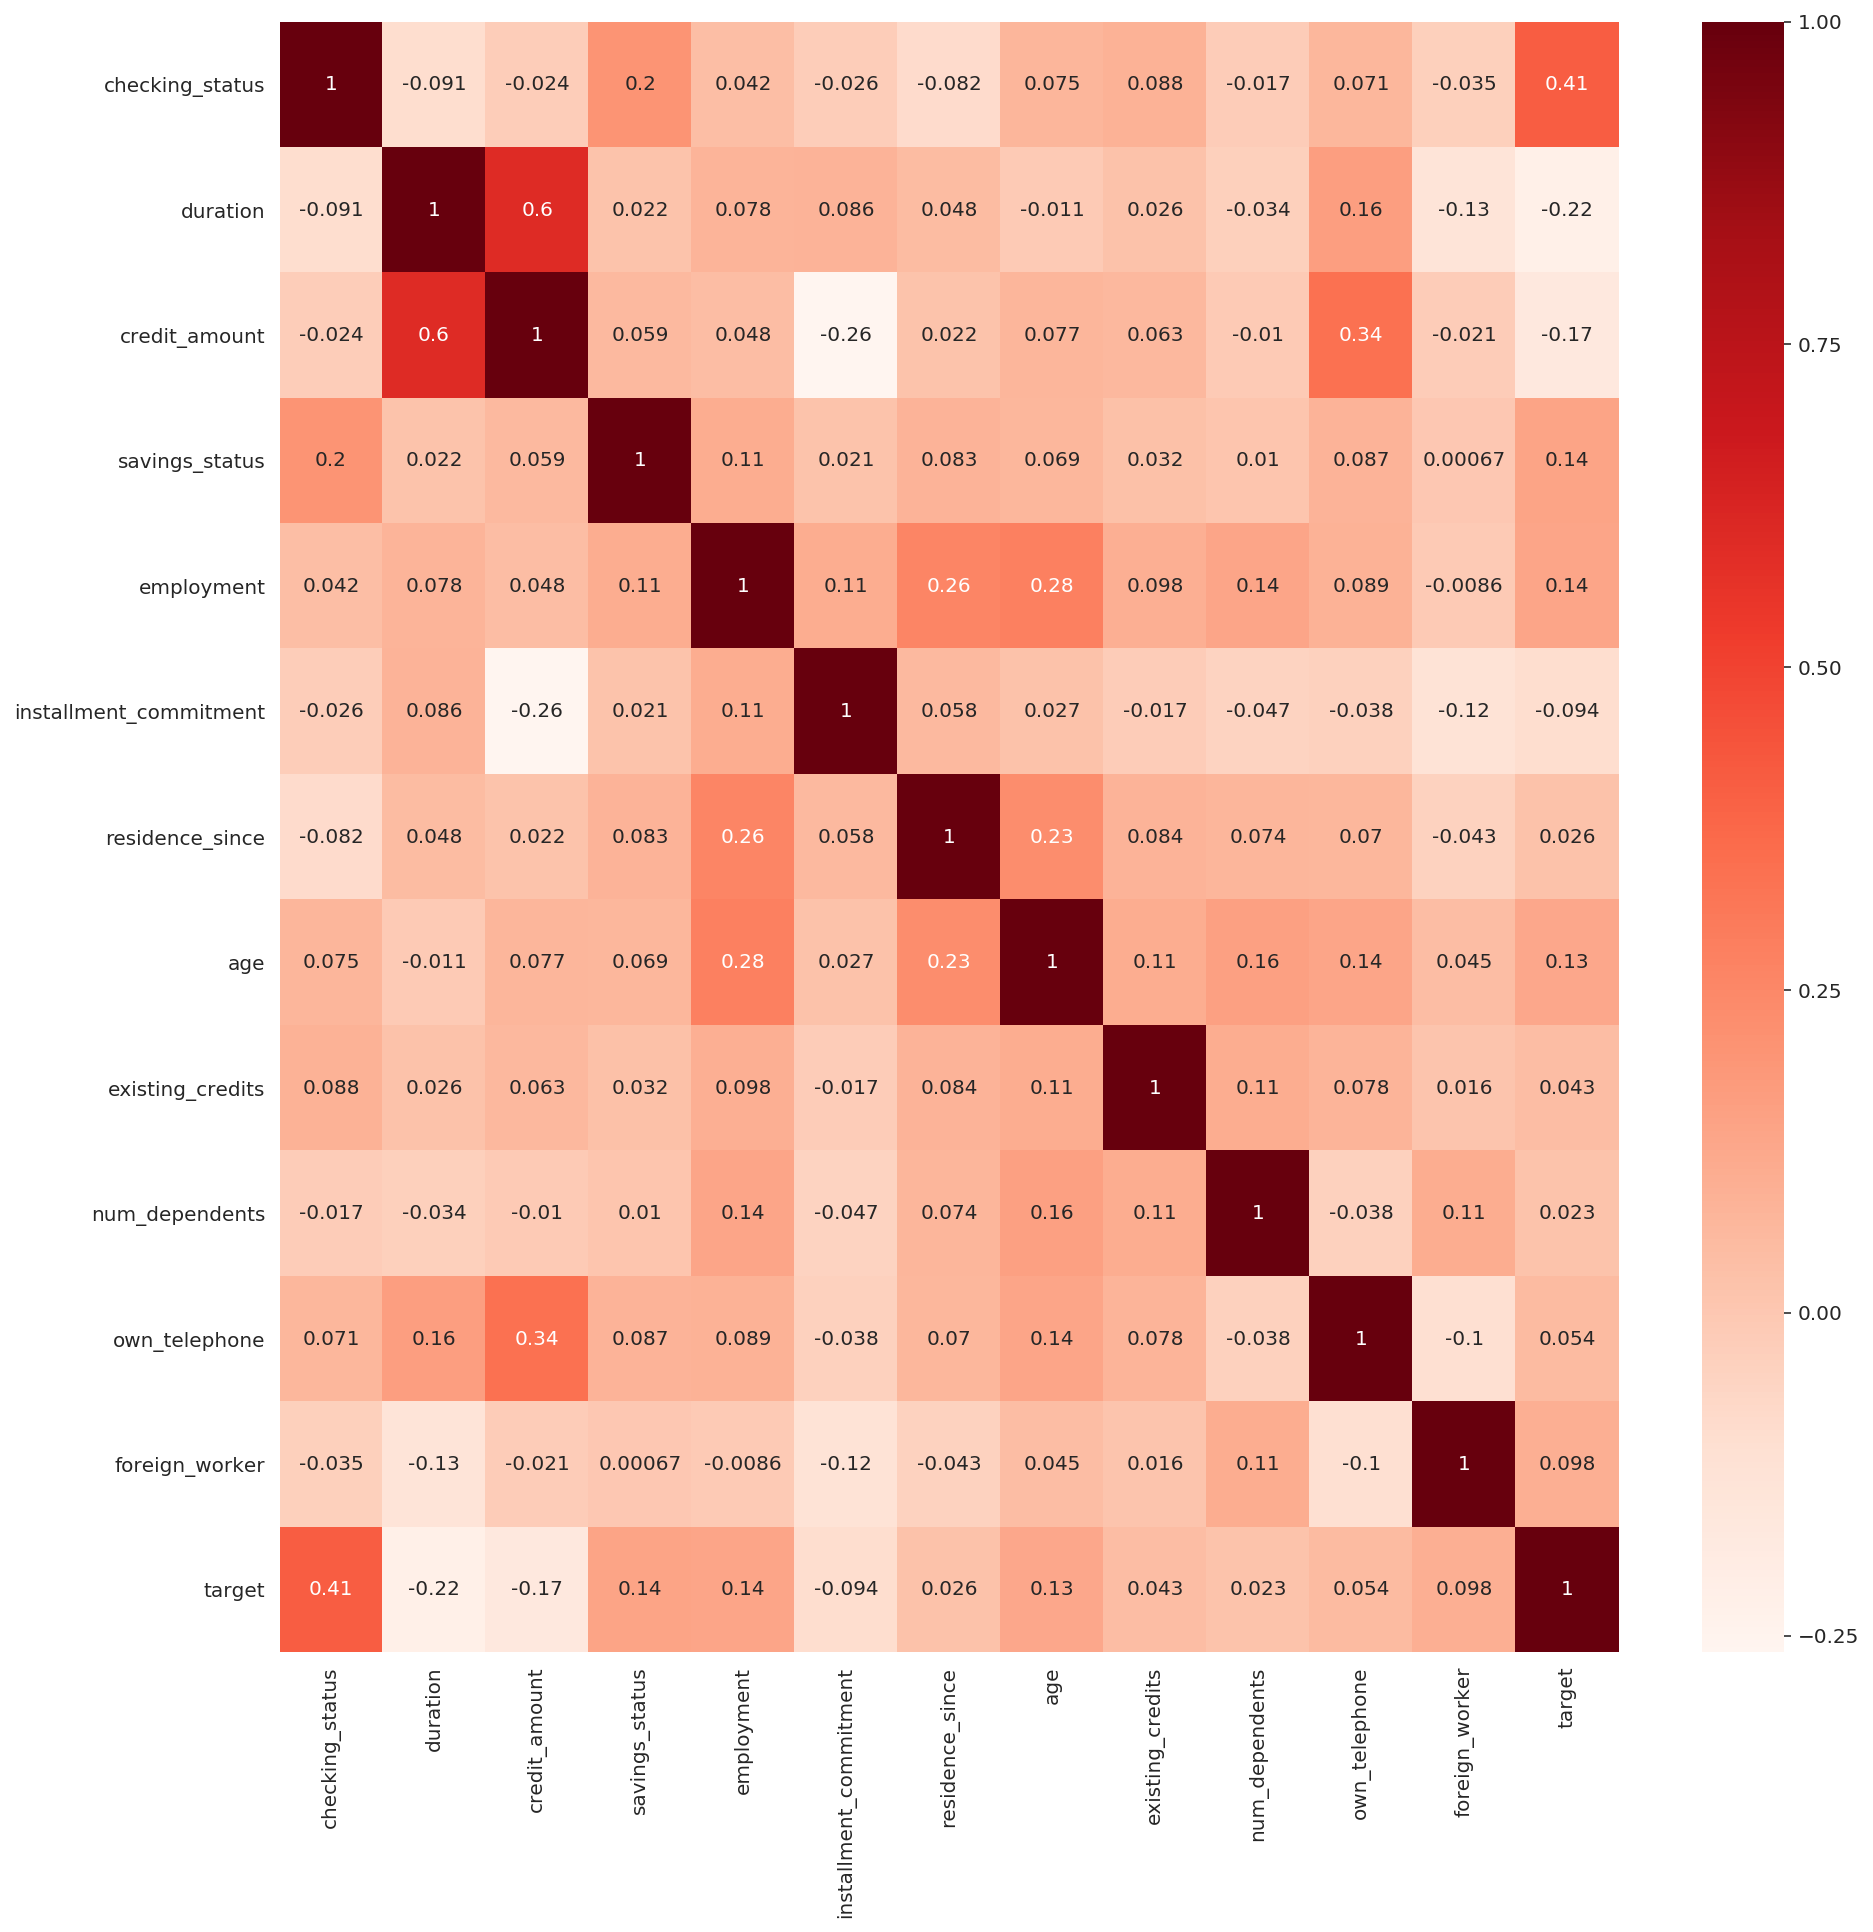

Input size: 12, Output size: 2
> epoch 0	Loss 0.00694	Acc 0.47333
> epoch 50	Loss 0.00643	Acc 0.72333
> epoch 100	Loss 0.00477	Acc 0.76333
> epoch 150	Loss 0.00434	Acc 0.78667
> epoch 200	Loss 0.00379	Acc 0.82667
> epoch 250	Loss 0.00308	Acc 0.85333
> epoch 300	Loss 0.00235	Acc 0.88667
> epoch 350	Loss 0.00162	Acc 0.93333


In [3]:
# i. データの読み込み
# Load initial dataset
df_orig, target, feature_names = get_df(DATASET)

# ii. バランス
# Balance dataset classes
df = balance_df(df_orig.copy(), target, SEED)

# 2. 関数の呼び出し
bounds = get_bounds(df_orig)

# Normalize the data
scaler, df, bounds = normalize(df, target, feature_names, bounds)

# Compute the weihts modelizing the expert's knowledge
weights = get_weights(df, target)

# Split df into train/test/valid
df_train, df_test, df_valid = split_train_test_valid(df)

# Build experimenation config
config = {'Dataset'     : 'credit-g',
         'MaxIters'     : 20000,
         'Alpha'        : 0.001,
         'Lambda'       : 8.5,
         'TrainData'    : df_train,
         'TestData'     : df_test,
         'ValidData'    : df_valid,
         'Scaler'       : scaler,
         'FeatureNames' : feature_names,
         'Target'       : target,
         'Weights'      : weights,
         'Bounds'       : bounds}

# Train neural network
model = get_model(config)
config['Model'] = model

In [4]:
# Sub sample
config['TestData'] = config['TestData'].sample(n=10, random_state = SEED)

# Generate adversarial examples
df_adv_lpf = gen_adv(config, 'LowProFool')
df_adv_df = gen_adv(config, 'Deepfool')
config['AdvData'] = {'LowProFool' : df_adv_lpf, 'Deepfool' : df_adv_df}

# Compute metrics
list_metrics = {'SuccessRate' : True,
                'iter_means': False,
                'iter_std': False,
                'normdelta_median': False,
                'normdelta_mean': True,
                'n_std': True,
                'weighted_median': False,
                'weighted_mean': True,
                'w_std': True,
                'mean_dists_at_org': False,
                'median_dists_at_org': False,
                'mean_dists_at_tgt': False,
                'mean_dists_at_org_weighted': True,
                'mdow_std': True,
                'median_dists_at_org_weighted': False,
                'mean_dists_at_tgt_weighted': True,
                'mdtw_std': True,
                'prop_same_class_arg_org': False,
                'prop_same_class_arg_adv': False}

all_metrics = get_metrics(config, list_metrics)
all_metrics = pd.DataFrame(all_metrics, columns=['Method'] + [k for k, v in list_metrics.items() if v])
all_metrics

685
output_prod [0.94910836 0.0508916 ]
727
output_prod [0.06938603 0.93061393]
30
output_prod [0.9620733  0.03792668]
376
output_prod [0.05829263 0.9417074 ]
66
output_prod [0.95745    0.04255006]
965
output_prod [0.06084869 0.9391513 ]
963
output_prod [0.8797174 0.1202826]
61
output_prod [0.9796169 0.0203831]
282
output_prod [0.983808   0.01619204]
268
output_prod [0.01650234 0.98349774]



685
727
30
376
66
965
963
61
282
268



,Method,SuccessRate,normdelta_mean,n_std,weighted_mean,w_std,mean_dists_at_org_weighted,mdow_std,mean_dists_at_tgt_weighted,mdtw_std
0,LowProFool,1.0,0.440746,0.282968,0.034682,0.026306,0.214625,0.085894,0.214534,0.087189
1,Deepfool,1.0,0.174393,0.149775,0.072082,0.067179,0.214625,0.085894,0.213880,0.089764


In [ ]:
print("a")